In [36]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("data/curve80.txt",delimiter=None) 

X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional 
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # 

In [37]:
# 1.1
print(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

(60, 1) (20, 1) (60,) (20,)


In [38]:
# 1.2
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) 
xs = xs[:,np.newaxis]
ys = lr.predict( xs )

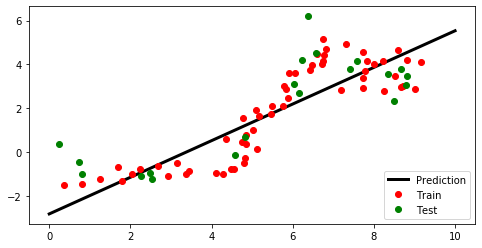

In [39]:

plt.rcParams['figure.figsize'] = (8.0, 4.0)
lines = plt.plot(xs,ys,'k-',Xtr,Ytr,'r.',Xte,Yte,'g.', linewidth=3,markersize=12) 
plt.legend(['Prediction','Train','Test'],loc='lower right');

In [40]:
print(lr.theta)


[[-2.82765049  0.83606916]]


In [42]:
print("y=",lr.theta[0][0],"+",lr.theta[0][1],"x1")

y= -2.827650487664812 + 0.8360691602619539 x1


In [24]:
print("MSE(Train)=", lr.mse(Xtr,Ytr)) 
print("MSE(Test)=", lr.mse(Xte,Yte))

MSE(Train)= 1.127711955609391
MSE(Test)= 2.2423492030101246


In [31]:
# 1.3
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features 
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "x^2" feature as X2
# Now, Xtr2 has two features about each data point: "x" and "x^2"
print (Xtr.shape)
print (Xtr2.shape)
print (Xtr2[0:6,:])

(60, 1)
(60, 2)
[[ 3.4447005  11.86596153]
 [ 4.7580645  22.63917779]
 [ 6.4170507  41.17853969]
 [ 5.7949309  33.58122414]
 [ 7.7304147  59.75931143]
 [ 7.8225806  61.19276724]]


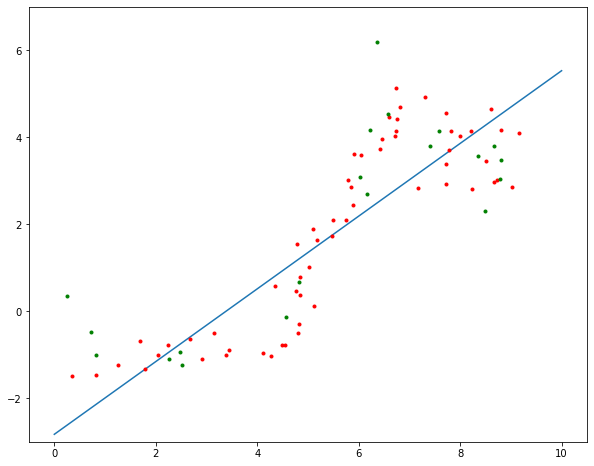

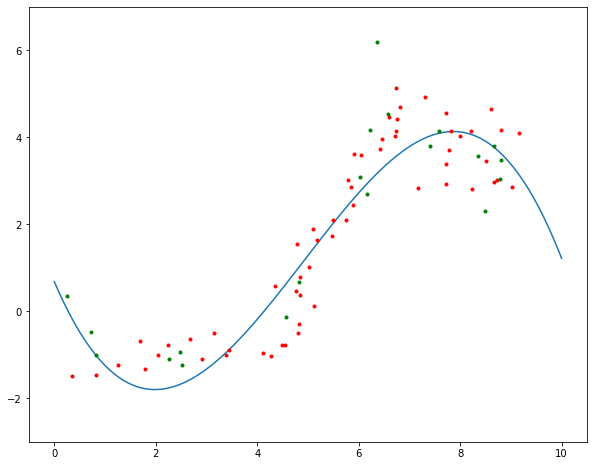

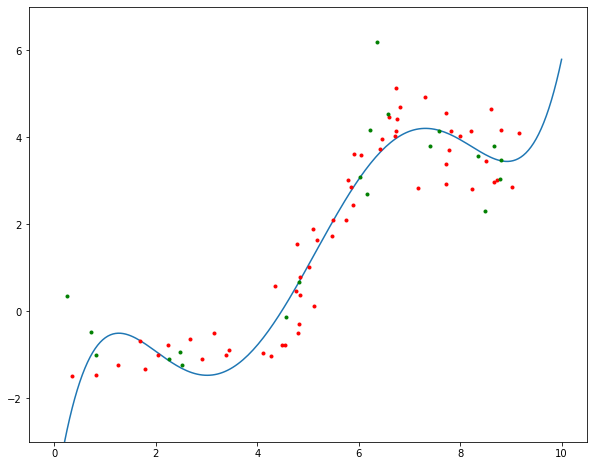

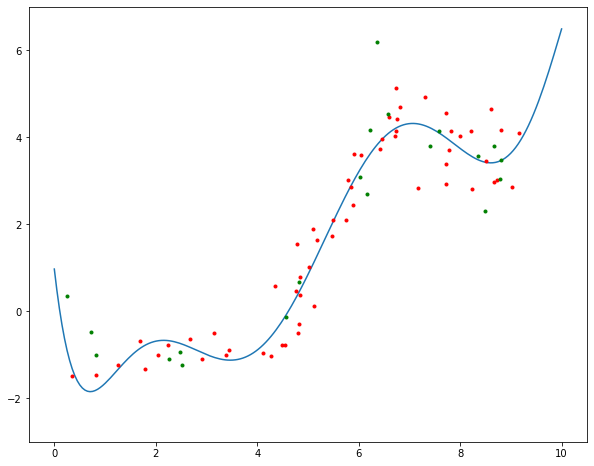

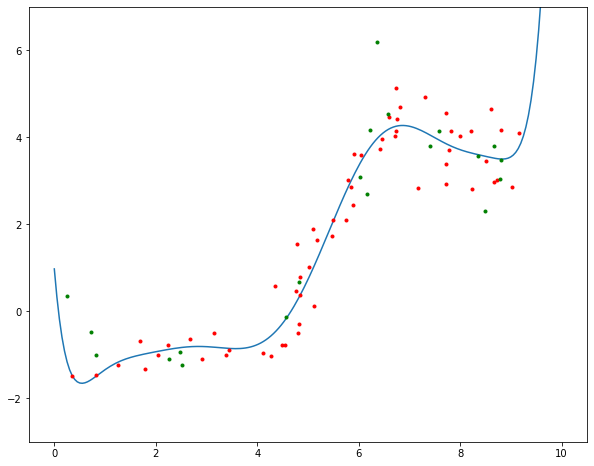

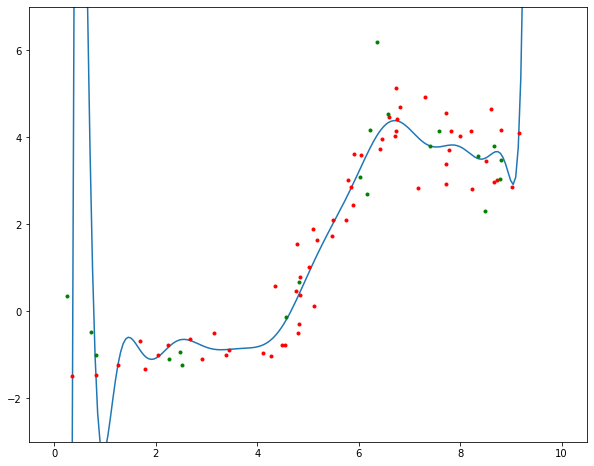

In [48]:
degree=range(0,19)
errTrain=np.zeros((len(degree),))
errValid=np.zeros((len(degree),))


for i in degree:
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
# Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
# params returns the transformation parameters (shift & scale)
# Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
# Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,i,False), params)
    ys = lr.predict(ml.transforms.rescale(ml.transforms.fpoly(xs,i,False),params)[0])
    
    errTrain[i]=lr.mse(XtrP, Ytr)
    errValid[i]=lr.mse(XteP, Yte)
    
    if i in [1,3,5,7,10,18]:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        ax.plot(xs, ys, Xtr, Ytr, 'r.', Xte, Yte, 'g.')
        ax.set_ylim(-3,7)
        plt.show()

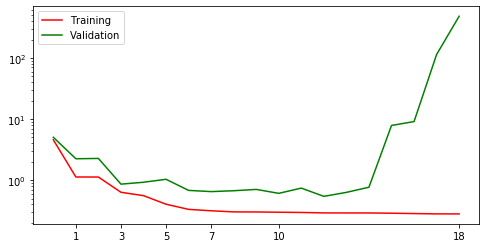

In [51]:
degree=range(0,19)
plt.semilogy(degree,errTrain,'r-',degree,errValid,'g-') 
plt.xticks([1,3,5,7,10,18])
plt.legend(['Training','Validation'])
plt.show()

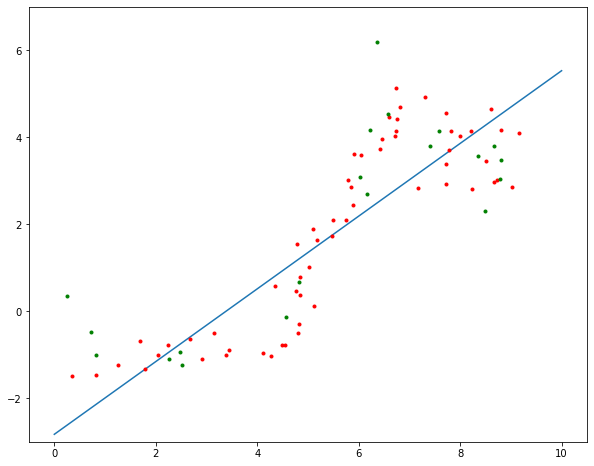

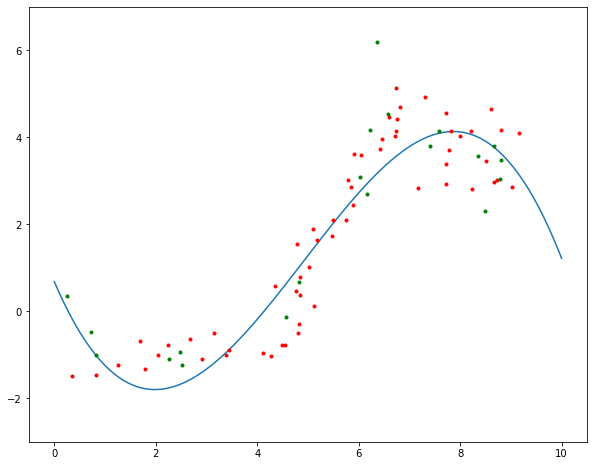

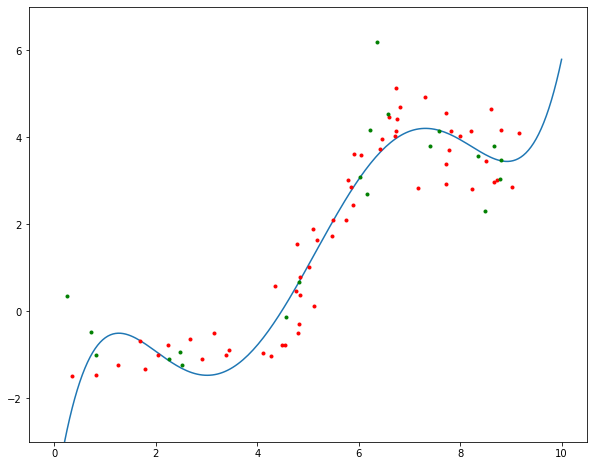

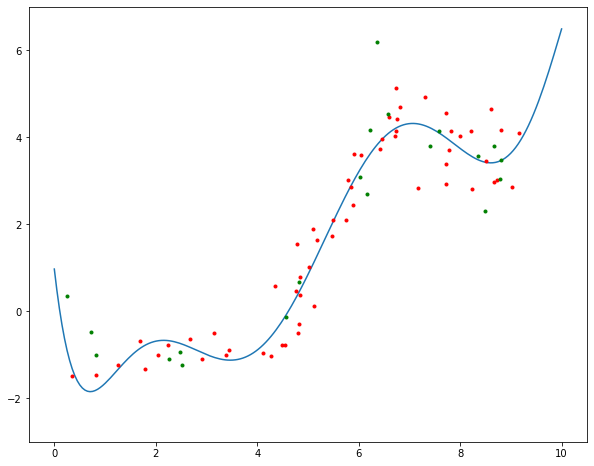

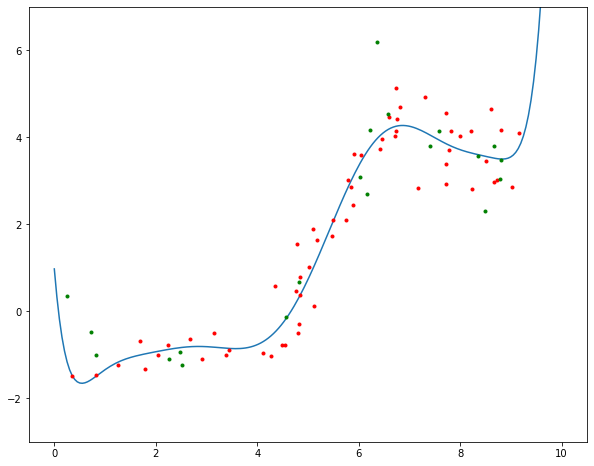

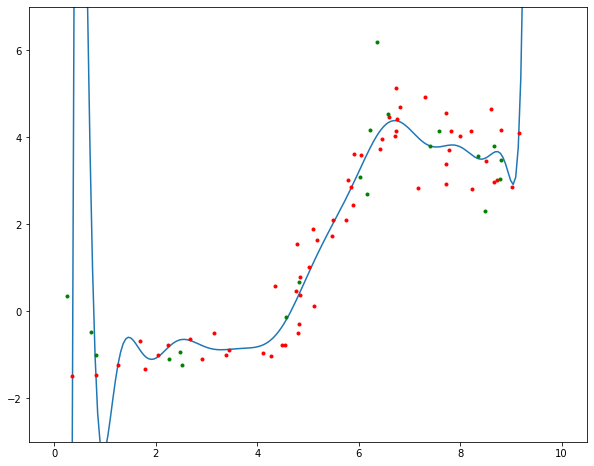

In [26]:
errTrain=[]
errValid=[]

for i in [ 1, 3, 5, 7, 10, 18]:
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False)
# Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
# params returns the transformation parameters (shift & scale)
# Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
# Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,i,False), params)
    ys = lr.predict(ml.transforms.rescale(ml.transforms.fpoly(xs,i,False),params)[0])
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    errTrain.append( lr.mse(XtrP, Ytr))
    errValid.append(lr.mse(XteP, Yte))
    ax.plot(xs, ys, Xtr, Ytr, 'r.', Xte, Yte, 'g.')
    ax.set_ylim(-3,7)
    plt.show()

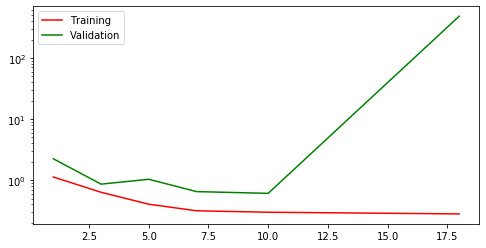

In [27]:
degree=[1,3,5,7,10,18]
plt.semilogy(degree,errTrain,'r-',degree,errValid,'g-') 
plt.legend(['Training','Validation'])
plt.show()

p=10

In [28]:
# Q2

def cross_valid(nFolds,degree):
    J=np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation 
        Xtip=ml.transforms.fpoly(Xti,degree,bias=False)
        Xtip,params=ml.transforms.rescale(Xtip)
        learner = ml.linear.linearRegress(Xtip,Yti) # TODO: train on Xti, Yti, the data for this fold
        Xvip,_=ml.transforms.rescale(ml.transforms.fpoly(Xvi,degree,bias=False),params)
        J[iFold] =learner.mse(Xvip,Yvi) # TODO: now compute the MSE on Xvi, Yvi and save it
        # the overall estimated validation error is the average of the error on each fold
    return np.mean(J)

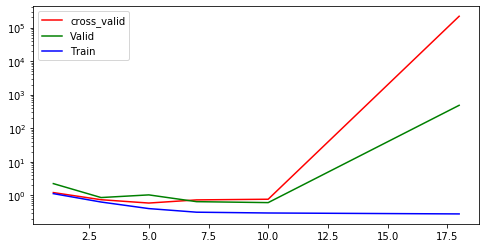

In [29]:
errX=[]
nFolds=5
degree=[1,3,5,7,10,18]
for i in degree:
    a=cross_valid(5,i)
    errX.append(a)

plt.semilogy(degree,errX,'r-',degree,errValid,'g-',degree,errTrain,'b-') 
plt.legend(["cross_valid","Valid","Train"])
plt.show()

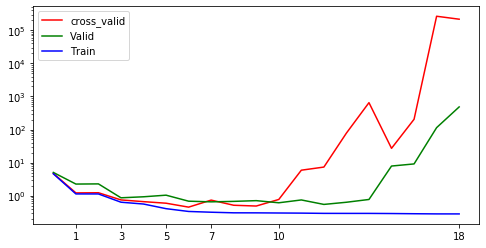

In [53]:
errX=[]
nFolds=5
degree=np.array(range(0,19))
for i in degree:
    a=cross_valid(5,i)
    errX.append(a)

plt.semilogy(degree,errX,'r-',degree,errValid,'g-',degree,errTrain,'b-') 
plt.legend(["cross_valid","Valid","Train"])
plt.xticks([1,3,5,7,10,18]);
plt.show()

2.2
cross_valid only use 80% data to train, which leads to the high degree polynomial more complicate, can not generalize well to test data, overfit

In [ ]:
degree=5 or 7?

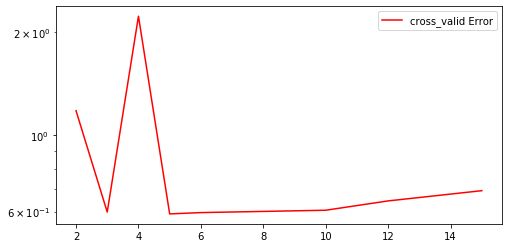

In [41]:
nFold_list=[2, 3, 4, 5, 6, 10, 12, 15]
errC=[]
for i in nFold_list:
    a=cross_valid(i,5)
    errC.append(a)
    
plt.semilogy(nFold_list,errC,'r-') 
plt.legend(["cross_valid Error"])
plt.show()

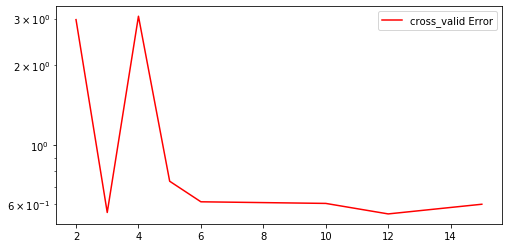

In [54]:
nFold_list=[2, 3, 4, 5, 6, 10, 12, 15]
errC=[]
for i in nFold_list:
    a=cross_valid(i,7)
    errC.append(a)
    
plt.semilogy(nFold_list,errC,'r-') 
plt.legend(["cross_valid Error"])
plt.show()

2.4
When the number of fold is small, it will lead to higher error rate since the traning data the model used is small; 
higher folds will use more training data, which will help to make more reasonable models and lower error rate. 

The spikes occured when fold is smal is maybe because of the unfortunite split, which may contain some outliers among their traning data, and this may leads to the train is not reasonble and extremely high error rate. 
Higher folds with large enough data can be robust enough to cover these outliers, which lead to the low error rate. 
